ultrasound_seg_data 类型: float64
ultrasound_seg_data 形状: (2, 32, 15000)


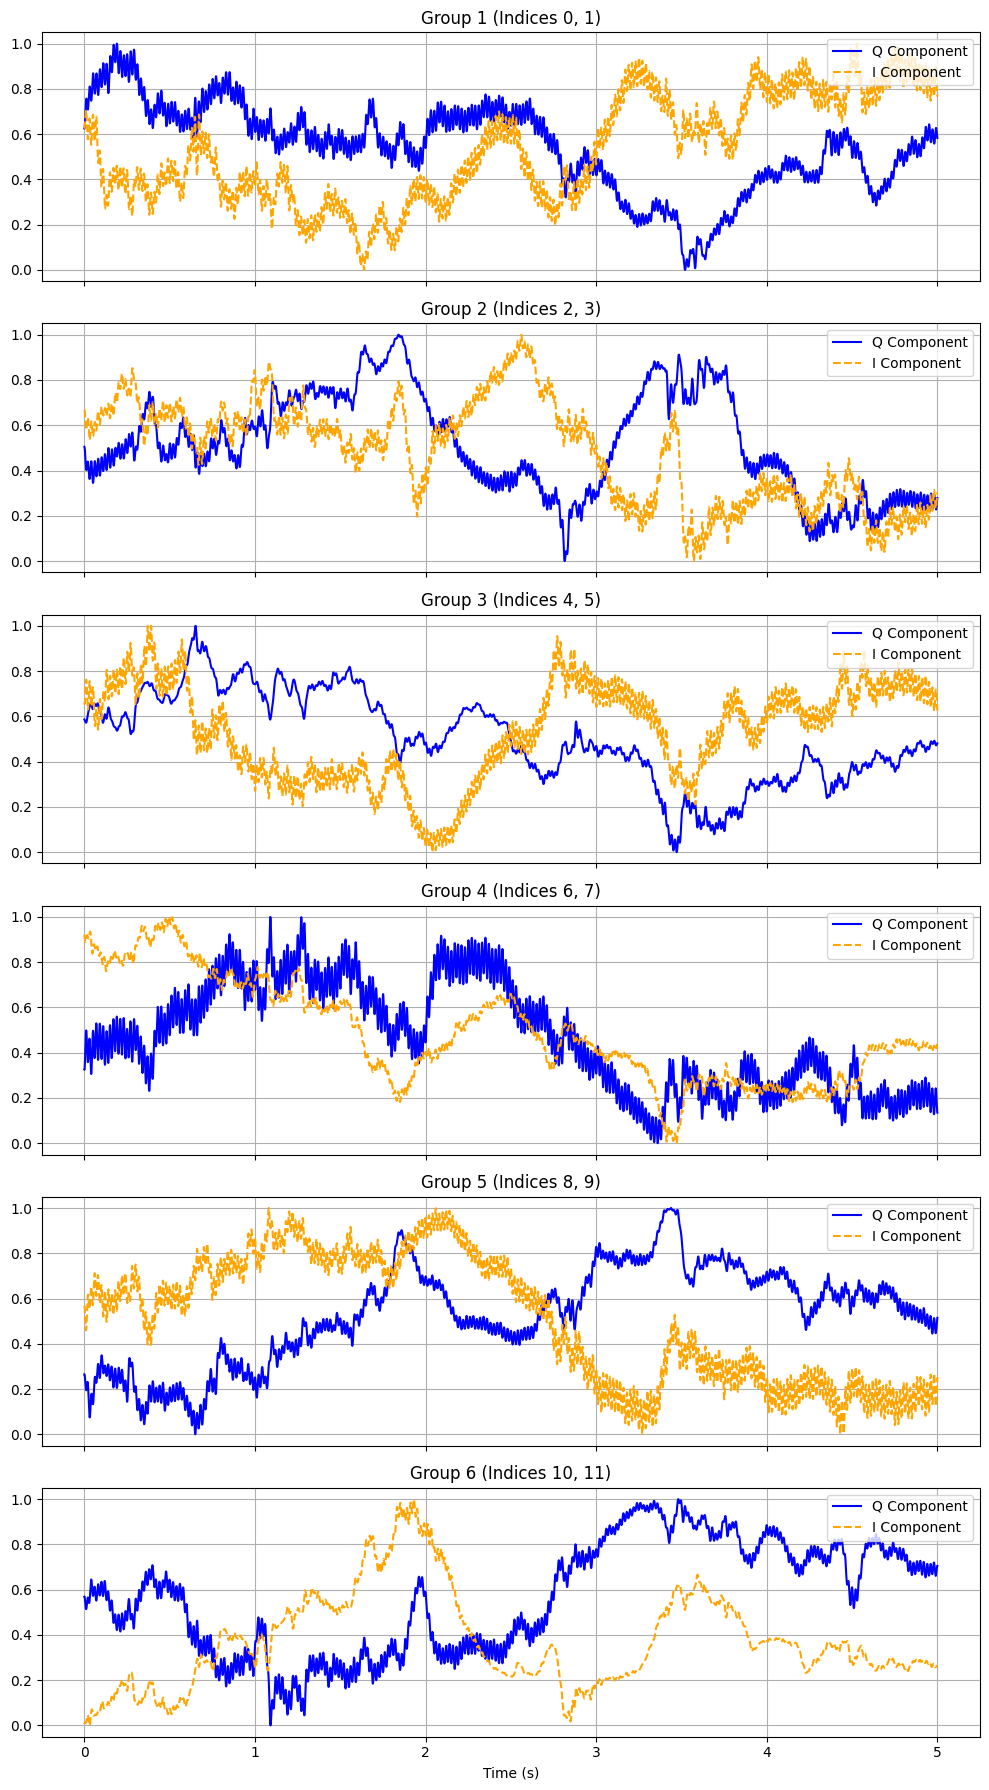

In [3]:
import numpy as np
import matplotlib.pyplot as plt



ultrasound_seg_path = r"E:\dataset\ultrasound_video_audio\DATA\dataset\ldx1\ldx1_seg_0005_us.npy"
ultrasound_seg_data = np.load(ultrasound_seg_path) #[2, 32, T]
print("ultrasound_seg_data 类型:", ultrasound_seg_data.dtype)       
print("ultrasound_seg_data 形状:", ultrasound_seg_data.shape)

num_groups_to_plot = 6
channel_index = 1  # First receiving channel
fs = 3000

# Time axis
time_axis = np.arange(ultrasound_seg_data.shape[2]) / fs

# fig, ax = plt.subplots(figsize=(12, 6))

# for i in range(num_groups_to_plot):
#     # IQ pairs are typically adjacent in the dimension 1
#     # Assuming layout: [I_f1, Q_f1, I_f2, Q_f2, ...]
#     i_idx = i * 2
#     q_idx = i * 2 + 1
    
#     # Plot I component
#     ax.plot(time_axis, ultrasound_seg_data[channel_index, i_idx, :], label=f'Group {i+1} I')
#     # Plot Q component
#     ax.plot(time_axis, ultrasound_seg_data[channel_index, q_idx, :], label=f'Group {i+1} Q', linestyle='--')

# ax.set_xlabel('Time (s)')
# ax.set_title(f'First Channel - First {num_groups_to_plot} IQ Groups')
# ax.legend()
# plt.tight_layout()
# plt.show()
# print("ultrasound_seg_data 形状:", ultrasound_seg_data.shape)

# Create subplots for each IQ group
fig, axes = plt.subplots(num_groups_to_plot, 1, figsize=(10, 3 * num_groups_to_plot), sharex=True)
for i in range(num_groups_to_plot):
    i_idx = i * 2
    q_idx = i * 2 + 1
    
    # Select the axis
    ax = axes[i] if num_groups_to_plot > 1 else axes
    
    # Plot Q component
    ax.plot(time_axis, ultrasound_seg_data[channel_index, i_idx, :], label='Q Component', color='blue')
    # Plot I component
    ax.plot(time_axis, ultrasound_seg_data[channel_index, q_idx, :], label='I Component', color='orange', linestyle='--')
    
    ax.set_title(f'Group {i+1} (Indices {i_idx}, {q_idx})')
    ax.legend(loc='upper right')
    ax.grid(True)

# Set common labels
if num_groups_to_plot > 1:
    axes[-1].set_xlabel('Time (s)')
else:
    axes.set_xlabel('Time (s)')

plt.tight_layout()
plt.show()

ultrasound_seg_data 类型: float64
ultrasound_seg_data 形状: (2, 32, 15000)


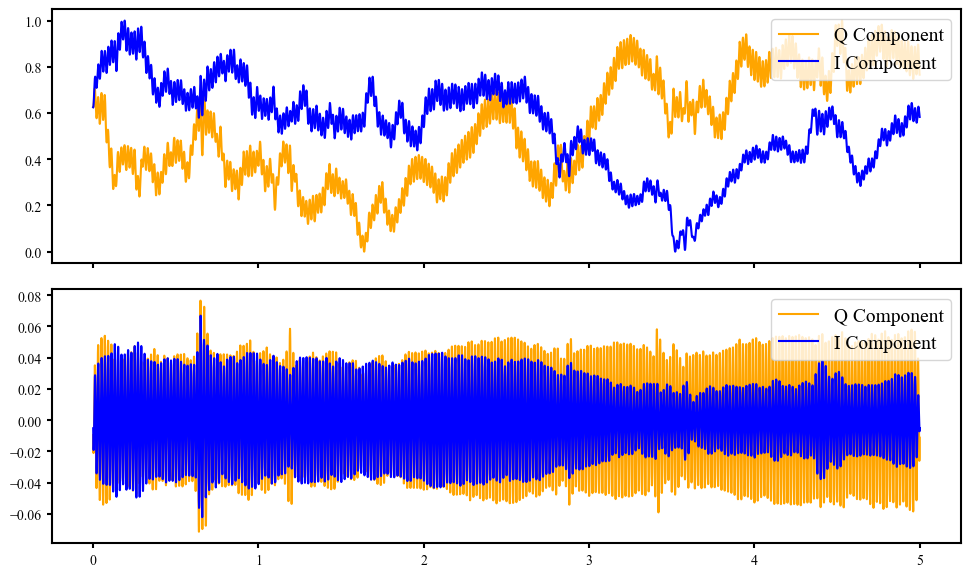

In [15]:
import numpy as np
import os
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

output_dir = "./paper_fig"

ultrasound_seg_path = r"E:\dataset\ultrasound_video_audio\DATA\dataset\ldx1\ldx1_seg_0005_us.npy"
ultrasound_seg_data = np.load(ultrasound_seg_path) #[2, 32, T]
print("ultrasound_seg_data 类型:", ultrasound_seg_data.dtype)       
print("ultrasound_seg_data 形状:", ultrasound_seg_data.shape)

num_groups_to_plot = 6
channel_index = 1 # First receiving channel
fs = 3000

# Time axis
time_axis = np.arange(ultrasound_seg_data.shape[2]) / fs

# fig, ax = plt.subplots(figsize=(12, 6))

# for i in range(num_groups_to_plot):
#     # IQ pairs are typically adjacent in the dimension 1
#     # Assuming layout: [I_f1, Q_f1, I_f2, Q_f2, ...]
#     i_idx = i * 2
#     q_idx = i * 2 + 1
    
#     # Plot I component
#     ax.plot(time_axis, ultrasound_seg_data[channel_index, i_idx, :], label=f'Group {i+1} I')
#     # Plot Q component
#     ax.plot(time_axis, ultrasound_seg_data[channel_index, q_idx, :], label=f'Group {i+1} Q', linestyle='--')

# ax.set_xlabel('Time (s)')
# ax.set_title(f'First Channel - First {num_groups_to_plot} IQ Groups')
# ax.legend()
# plt.tight_layout()
# plt.show()
# print("ultrasound_seg_data 形状:", ultrasound_seg_data.shape)

# # Create subplots for each IQ group
# fig, axes = plt.subplots(num_groups_to_plot, 1, figsize=(10, 3 * num_groups_to_plot), sharex=True)
# for i in range(num_groups_to_plot):
#     i_idx = i * 2
#     q_idx = i * 2 + 1
    
#     # Select the axis
#     ax = axes[i] if num_groups_to_plot > 1 else axes
    
#     # Plot Q component
#     ax.plot(time_axis, ultrasound_seg_data[channel_index, i_idx, :], label='Q Component', color='blue')
#     # Plot I component
#     ax.plot(time_axis, ultrasound_seg_data[channel_index, q_idx, :], label='I Component', color='orange', linestyle='--')
    
#     ax.set_title(f'Group {i+1} (Indices {i_idx}, {q_idx})')
#     ax.legend(loc='upper right')
#     ax.grid(True)

# # Set common labels
# if num_groups_to_plot > 1:
#     axes[-1].set_xlabel('Time (s)')
# else:
#     axes.set_xlabel('Time (s)')

# plt.tight_layout()
# plt.show()

# Select first group
show_time_window = 5.0  # seconds
end_idx = int(fs * show_time_window)
ultrasound_seg_data = ultrasound_seg_data[..., :end_idx]
time_axis = time_axis[:end_idx]

plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

i_idx = 0
q_idx = 1
i_sig = ultrasound_seg_data[channel_index, i_idx, :]
q_sig = ultrasound_seg_data[channel_index, q_idx, :]

# High-pass filter at 50 Hz
cutoff = 40.0
b, a = butter(4, cutoff / (fs / 2), btype="high")
i_filt = filtfilt(b, a, i_sig)
q_filt = filtfilt(b, a, q_sig)

# Plot settings
plt.rcParams["font.family"] = "Times New Roman"

fig, axes_hp = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Before filtering
axes_hp[0].plot(time_axis, q_sig, label="Q Component", color="orange") #linestyle="--"
axes_hp[0].plot(time_axis, i_sig, label="I Component", color="blue")
# axes_hp[0].set_title("Before Filtering")
axes_hp[0].legend(loc="upper right")

# After filtering
axes_hp[1].plot(time_axis, q_filt, label="Q Component", color="orange")
axes_hp[1].plot(time_axis, i_filt, label="I Component", color="blue")
# axes_hp[1].set_title("After High-Pass Filtering (50 Hz)")
axes_hp[1].legend(loc="upper right")

# Axis styling
for ax_hp in axes_hp:
    # ax_hp.set_ylabel("Amplitude", fontweight="bold")
    ax_hp.tick_params(axis="both", labelsize=10, width=1.5)
    for spine in ax_hp.spines.values():
        spine.set_linewidth(1.5)

# axes_hp[1].set_xlabel("Time (s)", fontweight="bold")

plt.tight_layout()

# Save figure
save_path = os.path.join(output_dir, "group1_iq_before_after_filter.png")
fig.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

In [6]:
import os

# Create the output directory if it doesn't exist
output_dir = "./paper_fig"
os.makedirs(output_dir, exist_ok=True)

num_groups_to_save = 16

for i in range(num_groups_to_save):
    i_idx = i * 2
    q_idx = i * 2 + 1
    
    # Check if indices are within bounds of the data
    if q_idx >= ultrasound_seg_data.shape[1]:
        print(f"Index out of bounds for group {i+1}, stopping.")
        break

    # Create a new figure for each plot
    fig_single, ax_single = plt.subplots(figsize=(6, 4))
    
    # Plot Q component
    ax_single.plot(time_axis, ultrasound_seg_data[channel_index, i_idx, :], label='Q Component', color='blue')
    # Plot I component
    ax_single.plot(time_axis, ultrasound_seg_data[channel_index, q_idx, :], label='I Component', color='orange') #, linestyle='--'
    ax_single.legend(loc='upper right')
    
    # Remove axes and grid
    # Add a black frame around the plot
    ax_single.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], color='black', linewidth=4, transform=ax_single.transAxes, clip_on=False)

    ax_single.axis('off')
    ax_single.grid(False)
    
    # Save the figure
    save_path = os.path.join(output_dir, f"group_{i+1}_iq_plot.png")
    fig_single.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0)
    
    # Close the figure to free memory
    plt.close(fig_single)

print(f"Saved {num_groups_to_save} figures to {output_dir}")

Saved 16 figures to ./paper_fig
